In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

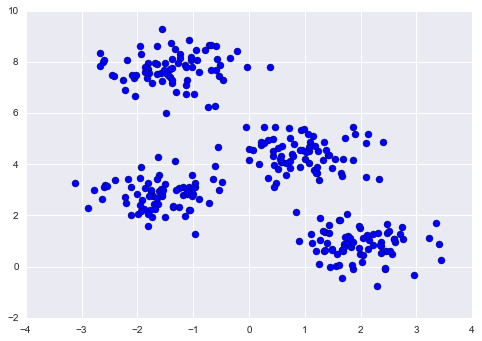

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

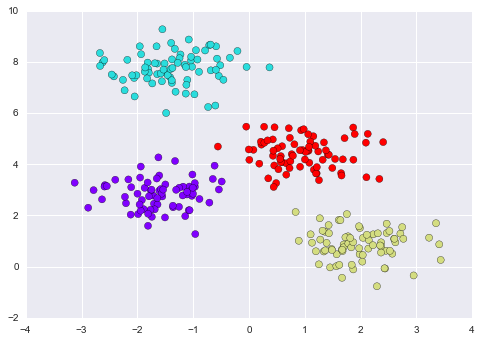

In [6]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

O algoritmo **K-Means** é um exemplo que utiliza EM (Maximização do Valor Esperado). Tal abordagem pode ser entendida por 2 passos apenas:
* *Chutar* os centróides de K clusters
* Repetir até convergir: Separar pontos mais próximos de determinado cluster. Re-calcular centróides dos clusters

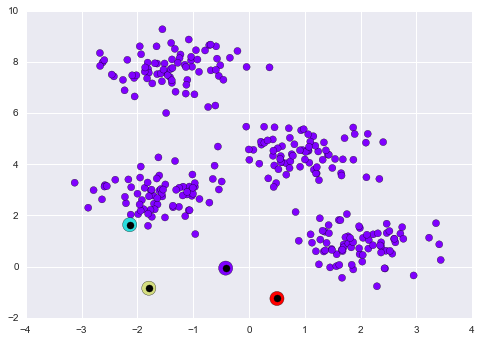

In [7]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive()

### K-Means aplicado para classificar Dígitos

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

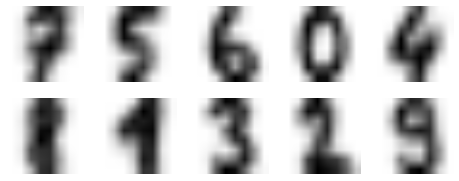

In [10]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [11]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

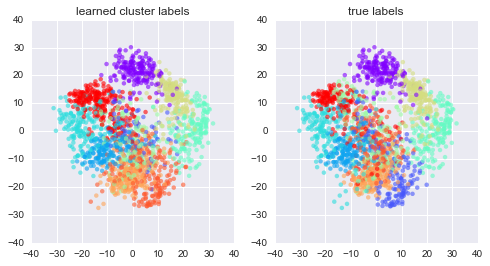

In [13]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79298831385642743

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 162   0   0   8   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   6   0   7   2 139]]


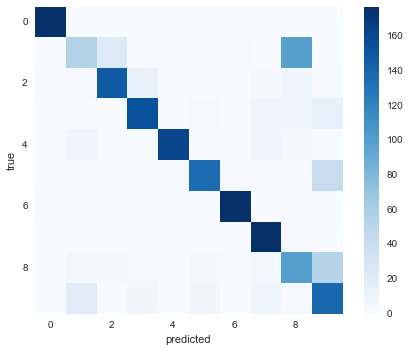

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### K-Means aplicado para compressão de cores

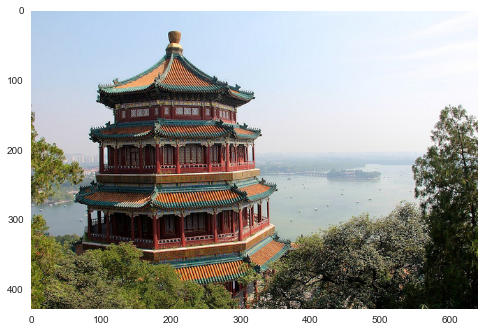

In [20]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

In [21]:
# Altura, Largura e RGB
china.shape

(427, 640, 3)

In [23]:
# Re-escalar. 273.280 pixels em 3 dimensões
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


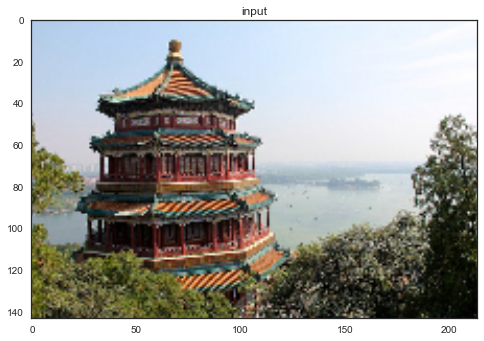

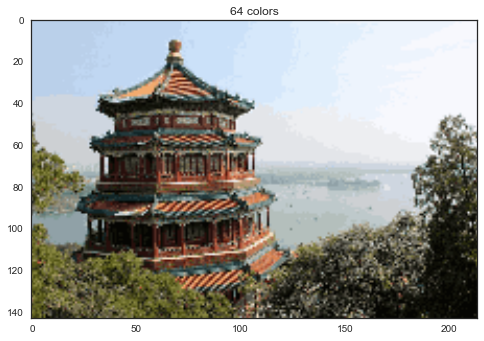

In [24]:
# Vamos reduzir o tamanho da imagem para melhorar performance.
# Queremos reduzir 256^3 para 64 cores
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# Criar e plotar a nova imagem gerada
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

In [29]:
new_X = (new_image / 255.0).reshape(-1, 3)
print(new_X.shape)

(30602, 3)
